+ 목적 : 다양한 자료를 대상으로, 모형 및 평가지표를 발굴함.

+ [x] 1.sample dataset(2-dimention)
  + [ ] rawdata
  + [ ] PAC
  + [ ] normalize

+ [x] 2.Model Result
  + [x] K-Means
  + [X] Mean-Shift Clustering
  + [x] DBSCAN
  + [x] EM Clustering using GMM
  + [x] Hierarchical Clustering

+ [ ] 3.Evaluate Result
  + [ ] Extrinsic Measures
  + [ ] Intrinsic Measures  

In [111]:
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools


from sklearn import cluster, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics


### 1.sample dataset(2-dimention)

In [2]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [67]:
# Using data from DataFrame
california_housing = datasets.fetch_california_housing()

df = pd.DataFrame(california_housing.data, columns = california_housing.feature_names)
df_data = np.array(df[['Latitude','Longitude' ]])
df_target = california_housing.target

In [72]:
noisy_moons

(array([[-0.05779396,  0.33707726],
        [ 0.94005499,  0.24698468],
        [ 0.78567283, -0.42345878],
        ...,
        [ 0.89063249,  0.14766589],
        [-0.02580475,  1.01898277],
        [-0.0913956 ,  1.0433527 ]]),
 array([1, 0, 1, ..., 0, 0, 0], dtype=int64))

In [3]:
def data_get(dataset):
    X, h = dataset
    return X

def data_2dim(dataset):
    X, h = dataset
    x, y= X[:, 0], X[:, 1]
    return x, y, h

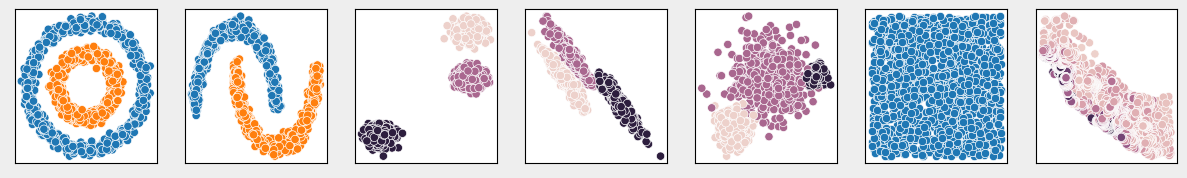

In [44]:
mpl.rc('figure', figsize=(15, 2), facecolor='#eeeeee' )
plt.subplot(1,7,1); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_circles)[0],y=data_2dim(noisy_circles)[1], hue=data_2dim(noisy_circles)[2],legend=False )
plt.subplot(1,7,2); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_moons)[0],  y=data_2dim(noisy_moons)[1],   hue=data_2dim(noisy_moons)[2],  legend=False )
plt.subplot(1,7,3); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(blobs)[0],        y=data_2dim(blobs)[1],         hue=data_2dim(blobs)[2],        legend=False )
plt.subplot(1,7,4); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(aniso)[0],        y=data_2dim(aniso)[1],         hue=data_2dim(aniso)[2],        legend=False )
plt.subplot(1,7,5); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(varied)[0],       y=data_2dim(varied)[1],        hue=data_2dim(varied)[2],       legend=False )
plt.subplot(1,7,6); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(no_structure)[0], y=data_2dim(no_structure)[1] )
plt.subplot(1,7,7); plt.xticks(()); plt.yticks(());sns.scatterplot(x=df_X,                       y=df_y,                        hue=df_dim,                     legend=False )

plt.show()

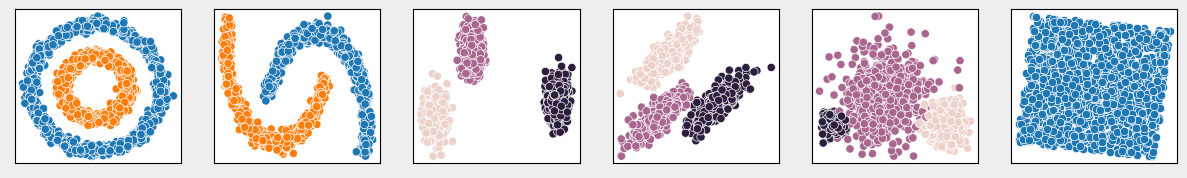

In [25]:
from sklearn.decomposition import PCA

def data_2dim(dataset):
    X, h = dataset
    X = PCA(n_components=2).fit_transform(X)
    x, y= X[:, 0], X[:, 1]
    return x, y, h

def data_get(dataset):
    X, h = dataset
    return X


mpl.rc('figure', figsize=(15, 2), facecolor='#eeeeee' )
plt.subplot(1,6,1); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_circles)[0],y=data_2dim(noisy_circles)[1], hue=data_2dim(noisy_circles)[2],legend=False )
plt.subplot(1,6,2); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_moons)[0],  y=data_2dim(noisy_moons)[1],   hue=data_2dim(noisy_moons)[2],  legend=False )
plt.subplot(1,6,3); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(blobs)[0],        y=data_2dim(blobs)[1],         hue=data_2dim(blobs)[2],        legend=False )
plt.subplot(1,6,4); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(aniso)[0],        y=data_2dim(aniso)[1],         hue=data_2dim(aniso)[2],        legend=False )
plt.subplot(1,6,5); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(varied)[0],       y=data_2dim(varied)[1],        hue=data_2dim(varied)[2],       legend=False )
plt.subplot(1,6,6); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(no_structure)[0], y=data_2dim(no_structure)[1] )
plt.show()

#### K-Means

In [13]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data_get(noisy_circles))
kmeans2 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data_get(noisy_moons))
kmeans3 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data_get(blobs))
kmeans4 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data_get(aniso))
kmeans5 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data_get(varied))
kmeans6 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data_get(no_structure))



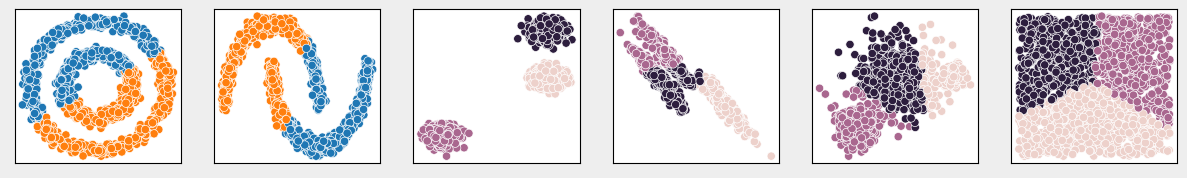

In [14]:

mpl.rc('figure', figsize=(15, 2), facecolor='#eeeeee' )
plt.subplot(1,6,1); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_circles)[0],  y=data_2dim(noisy_circles)[1], hue=kmeans1.labels_, legend=False )
plt.subplot(1,6,2); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_moons)[0], y=data_2dim(noisy_moons)[1], hue=kmeans2.labels_ , legend=False  )
plt.subplot(1,6,3); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(blobs)[0], y=data_2dim(blobs)[1]  , hue=kmeans3.labels_, legend=False )
plt.subplot(1,6,4); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(aniso)[0], y=data_2dim(aniso)[1]  , hue=kmeans4.labels_, legend=False )
plt.subplot(1,6,5); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(varied)[0], y=data_2dim(varied)[1], hue=kmeans5.labels_, legend=False  )
plt.subplot(1,6,6); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(no_structure)[0], y=data_2dim(no_structure)[1], hue=kmeans6.labels_, legend=False   )
plt.show()

#### Mean-Shift Clustering

In [51]:
from sklearn.cluster import MeanShift


Mean_Shift1 = MeanShift().fit(data_get(noisy_circles))
Mean_Shift2 = MeanShift().fit(data_get(noisy_moons))
Mean_Shift3 = MeanShift().fit(data_get(blobs))
Mean_Shift4 = MeanShift().fit(data_get(aniso))
Mean_Shift5 = MeanShift().fit(data_get(varied))
Mean_Shift6 = MeanShift().fit(data_get(no_structure))


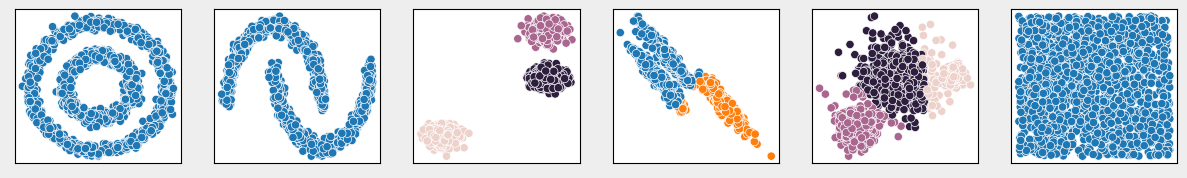

In [52]:
mpl.rc('figure', figsize=(15, 2), facecolor='#eeeeee' )
plt.subplot(1,6,1); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_circles)[0],y=data_2dim(noisy_circles)[1], hue=Mean_Shift1.labels_, legend=False )
plt.subplot(1,6,2); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_moons)[0], y=data_2dim(noisy_moons)[1],    hue=Mean_Shift2.labels_, legend=False )
plt.subplot(1,6,3); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(blobs)[0],       y=data_2dim(blobs)[1],          hue=Mean_Shift3.labels_, legend=False )
plt.subplot(1,6,4); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(aniso)[0],       y=data_2dim(aniso)[1],          hue=Mean_Shift4.labels_, legend=False )
plt.subplot(1,6,5); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(varied)[0],      y=data_2dim(varied)[1],         hue=Mean_Shift5.labels_, legend=False )
plt.subplot(1,6,6); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(no_structure)[0],y=data_2dim(no_structure)[1],   hue=Mean_Shift6.labels_, legend=False )
plt.show()

#### DBSCAN

In [134]:
from sklearn.cluster import DBSCAN

DBscan1 = DBSCAN(eps=.1).fit(data_get(noisy_circles))
DBscan2 = DBSCAN(eps=.1).fit(data_get(noisy_moons))
DBscan3 = DBSCAN(eps=1).fit(data_get(blobs))
DBscan4 = DBSCAN(eps=0.35).fit(data_get(aniso))
DBscan5 = DBSCAN(eps=0.6).fit(data_get(varied))
DBscan6 = DBSCAN(eps=0.3).fit(data_get(no_structure))


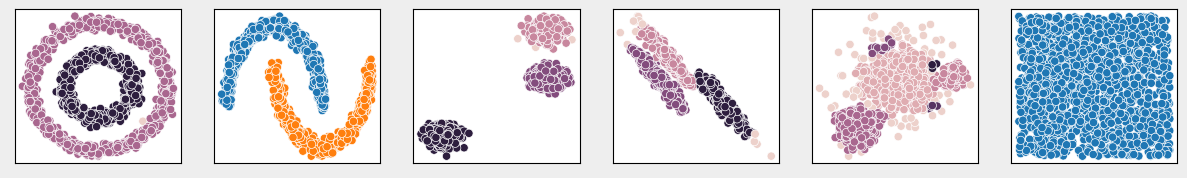

In [48]:
mpl.rc('figure', figsize=(15, 2), facecolor='#eeeeee' )
plt.subplot(1,6,1); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_circles)[0],  y=data_2dim(noisy_circles)[1], hue=DBscan1.labels_, legend=False )
plt.subplot(1,6,2); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_moons)[0], y=data_2dim(noisy_moons)[1], hue=DBscan2.labels_ , legend=False  )
plt.subplot(1,6,3); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(blobs)[0], y=data_2dim(blobs)[1]  , hue=DBscan3.labels_, legend=False )
plt.subplot(1,6,4); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(aniso)[0], y=data_2dim(aniso)[1]  , hue=DBscan4.labels_, legend=False )
plt.subplot(1,6,5); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(varied)[0], y=data_2dim(varied)[1], hue=DBscan5.labels_, legend=False  )
plt.subplot(1,6,6); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(no_structure)[0], y=data_2dim(no_structure)[1], hue=DBscan6.labels_, legend=False   )
plt.show()

In [145]:
parametr = np.linspace(0.01, 1, num = 20)
min_sample = np.arange(2,20, step = 2)

combinations = list(itertools.product(parametr, min_sample))
# N = len(combinations)

In [156]:
def DBSCAN_GriadSearch(combinations, X):
    scores = []
    all_label = []
    for i, (eps,num_sample) in enumerate(combinations):
        dbscan_model = DBSCAN(eps=eps,min_samples= num_sample).fit(X)
        lables = dbscan_model.labels_
        lables_set = set(lables)
        num_clusters = len(lables_set)
        if -1 in lables_set:
            num_clusters -= 1
        if (num_clusters<2) or (num_clusters>25):
            scores.append(-20)
            all_label.append('Poor')
            continue
        scores.append(shs(X,labels))
        all_label.append(shs(labels))
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels =all_label[best_index]
    best_score = scores[best_index]
    return {'best_epsilon' : best_parameters[0],
            'best_min_samples' : best_parameters[1],
            'best_label' : best_labels,
            'best_score' : best_score }

In [158]:
# grid search
GriadSearch_result = DBSCAN_GriadSearch(combinations,(data_2dim(varied)[0], data_2dim(varied)[1]))

In [160]:
GriadSearch_result['best_epsilon']

0.01

#### EM Clustering using GMM

In [71]:
from sklearn.mixture import GaussianMixture

EM1 = GaussianMixture(n_components=2).fit_predict(data_get(noisy_circles))
EM2 = GaussianMixture(n_components=2).fit_predict(data_get(noisy_moons))
EM3 = GaussianMixture(n_components=3).fit_predict(data_get(blobs))
EM4 = GaussianMixture(n_components=3).fit_predict(data_get(aniso))
EM5 = GaussianMixture(n_components=3).fit_predict(data_get(varied))
EM6 = GaussianMixture(n_components=3).fit_predict(data_get(no_structure))

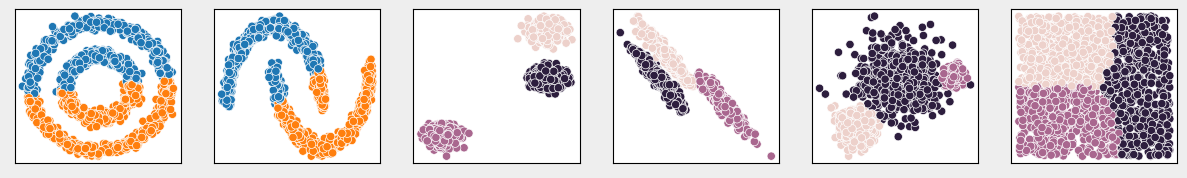

In [75]:
mpl.rc('figure', figsize=(15, 2), facecolor='#eeeeee' )
plt.subplot(1,6,1); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_circles)[0],y=data_2dim(noisy_circles)[1], hue=EM1, legend=False )
plt.subplot(1,6,2); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_moons)[0], y=data_2dim(noisy_moons)[1],    hue=EM2, legend=False )
plt.subplot(1,6,3); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(blobs)[0],       y=data_2dim(blobs)[1],          hue=EM3, legend=False )
plt.subplot(1,6,4); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(aniso)[0],       y=data_2dim(aniso)[1],          hue=EM4, legend=False )
plt.subplot(1,6,5); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(varied)[0],      y=data_2dim(varied)[1],         hue=EM5, legend=False )
plt.subplot(1,6,6); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(no_structure)[0],y=data_2dim(no_structure)[1],   hue=EM6, legend=False )
plt.show()

#### Hierarchical Clustering

In [59]:
from sklearn.cluster import AgglomerativeClustering

Hierarchical_C1 = AgglomerativeClustering().fit(data_get(noisy_circles))
Hierarchical_C2 = AgglomerativeClustering().fit(data_get(noisy_moons))
Hierarchical_C3 = AgglomerativeClustering(n_clusters=3).fit(data_get(blobs))
Hierarchical_C4 = AgglomerativeClustering(n_clusters=3).fit(data_get(aniso))
Hierarchical_C5 = AgglomerativeClustering(n_clusters=3).fit(data_get(varied))
Hierarchical_C6 = AgglomerativeClustering(n_clusters=3).fit(data_get(no_structure))


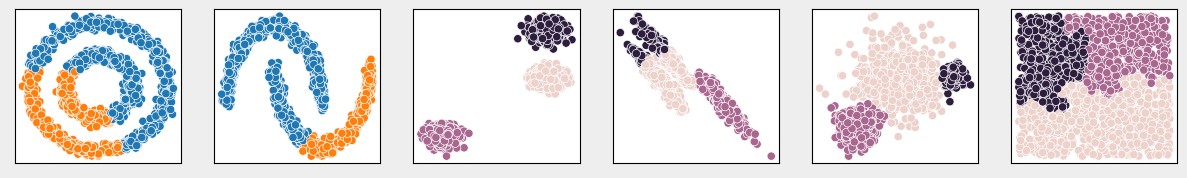

In [76]:
mpl.rc('figure', figsize=(15, 2), facecolor='#eeeeee' )
plt.subplot(1,6,1); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_circles)[0],y=data_2dim(noisy_circles)[1], hue=Hierarchical_C1.labels_, legend=False )
plt.subplot(1,6,2); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(noisy_moons)[0], y=data_2dim(noisy_moons)[1],    hue=Hierarchical_C2.labels_, legend=False )
plt.subplot(1,6,3); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(blobs)[0],       y=data_2dim(blobs)[1],          hue=Hierarchical_C3.labels_, legend=False )
plt.subplot(1,6,4); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(aniso)[0],       y=data_2dim(aniso)[1],          hue=Hierarchical_C4.labels_, legend=False )
plt.subplot(1,6,5); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(varied)[0],      y=data_2dim(varied)[1],         hue=Hierarchical_C5.labels_, legend=False )
plt.subplot(1,6,6); plt.xticks(()); plt.yticks(());sns.scatterplot(x=data_2dim(no_structure)[0],y=data_2dim(no_structure)[1],   hue=Hierarchical_C6.labels_, legend=False )
plt.show()

In [7]:
# kmeans1, kmeans2, kmeans3, kmeans4, kmeans5, kmeans6

In [12]:
from sklearn import metrics



metrics_result_kmeans.append(metrics.calinski_harabasz_score(X, kmeans1.labels_))
metrics_result_kmeans.append(metrics.calinski_harabasz_score(X, kmeans2.labels_))
metrics_result_kmeans.append(metrics.calinski_harabasz_score(X, kmeans3.labels_))
metrics_result_kmeans.append(metrics.calinski_harabasz_score(X, kmeans4.labels_))
metrics_result_kmeans.append(metrics.calinski_harabasz_score(X, kmeans5.labels_))
metrics_result_kmeans.append(metrics.calinski_harabasz_score(X, kmeans6.labels_))

[0.15942814087255366,
 0.26754182816508454,
 0.1751885730808079,
 1919.7942853653947,
 6168.45495330146,
 0.5521804270226278]